Dot count: 7


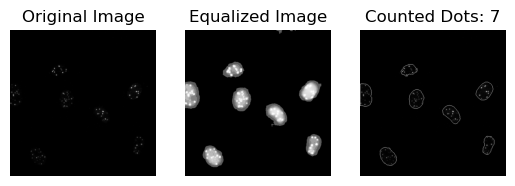

In [24]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage import exposure
# Load the image in grayscale
image_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/merged-pml-images-No-arsenic/flattened_position_1_C1.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
denoised_image = cv2.fastNlMeansDenoising(image, h=10, templateWindowSize=7, searchWindowSize=21)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(denoised_image)

# Apply binary thresholding
_, binary_image = cv2.threshold(equalized_image, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed

# Find contours and count dots
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
dot_count = len(contours)
print(f"Dot count: {dot_count}")

# Display result
result_image = cv2.drawContours(image.copy(), contours, -1, (255, 0, 0), 1)
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
plt.title("Original Image"), plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image"), plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(result_image, cmap='gray')
plt.title(f"Counted Dots: {dot_count}"), plt.axis("off")
plt.show()

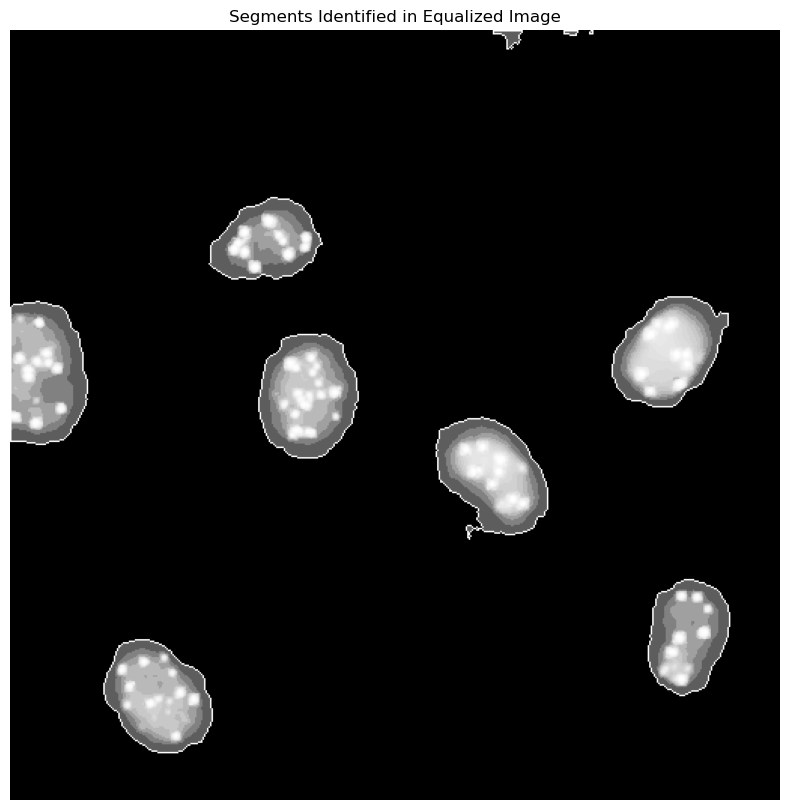

In [25]:
# Step 3: Segment the image using thresholding
_, segmented_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Find contours of the segments
contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Plot the segments
plt.figure(figsize=(10, 10))
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

# Overlay contours
for contour in contours:
    cv2.drawContours(equalized_image, [contour], -1, (255, 0, 0), 1)  # Draw contours in red

plt.imshow(equalized_image, cmap='gray')
plt.title('Segments Identified in Equalized Image')
plt.axis('off')
plt.show()

In [29]:
from PIL import Image
import numpy as np
from skimage.measure import label, regionprops
from skimage import exposure, img_as_ubyte
import os


image = Image.open(image_path).convert("L")
image_array = np.array(image)

# Equalize the histogram for better contrast
equalized_image = exposure.equalize_hist(image_array)

# Binarize the image
threshold = 0.5  # Adjust threshold if necessary
binary_image = equalized_image > threshold

# Label each connected component (each segment)
labeled_image = label(binary_image)
regions = regionprops(labeled_image)

# Create a directory to save the segments
output_dir = "segments"
os.makedirs(output_dir, exist_ok=True)

# Save each segment as a separate image
for i, region in enumerate(regions, start=1):
    # Create a mask for the current region
    region_mask = labeled_image == region.label
    
    # Apply the mask to the original image to isolate the segment
    segment_image = np.where(region_mask, image_array, 0)
    
    # Convert to an 8-bit image format
    segment_image = img_as_ubyte(segment_image)
    
    # Save the segment as an image file
    segment_image_pil = Image.fromarray(segment_image)
    segment_image_pil.save(os.path.join(output_dir, f"segment_{i}.png"))

print(f"Saved {len(regions)} segment images in the '{output_dir}' directory.")


Saved 1 segment images in the 'segments' directory.
